In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from meteostat import Point, Daily
from datetime import datetime
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.graph_objects as go

In [2]:
# Define the geographical point
# location = Point(40.4168, -3.7038) # Madrid
# location = Point(43.37135, -8.396) # Coruña
location = Point(36.719444, -4.420000) # Malaga

In [3]:
# Set the time period
start_date = datetime.now().year - 500 
start = datetime(start_date, 1, 1)
end = datetime.now()

In [4]:
# Create a Daily data object
data = Daily(location, start, end)
# Fetch the daily data
data = data.fetch()

In [5]:
# Calculate the average, minimum, and maximum temperatures
data['temp_avg'] = (data['tmax'] + data['tmin']) / 2  # average temperature
temperature_stats = data[['temp_avg', 'tmin', 'tmax']].resample('1D').mean()

In [6]:
# Resample data to yearly averages
yearly_averages = temperature_stats['temp_avg'].resample('YE').mean()

In [7]:
# Normalize the temperature data to scale the colors for yearly data
normalized_yearly_temp = (yearly_averages - yearly_averages.min()) / (yearly_averages.max() - yearly_averages.min())

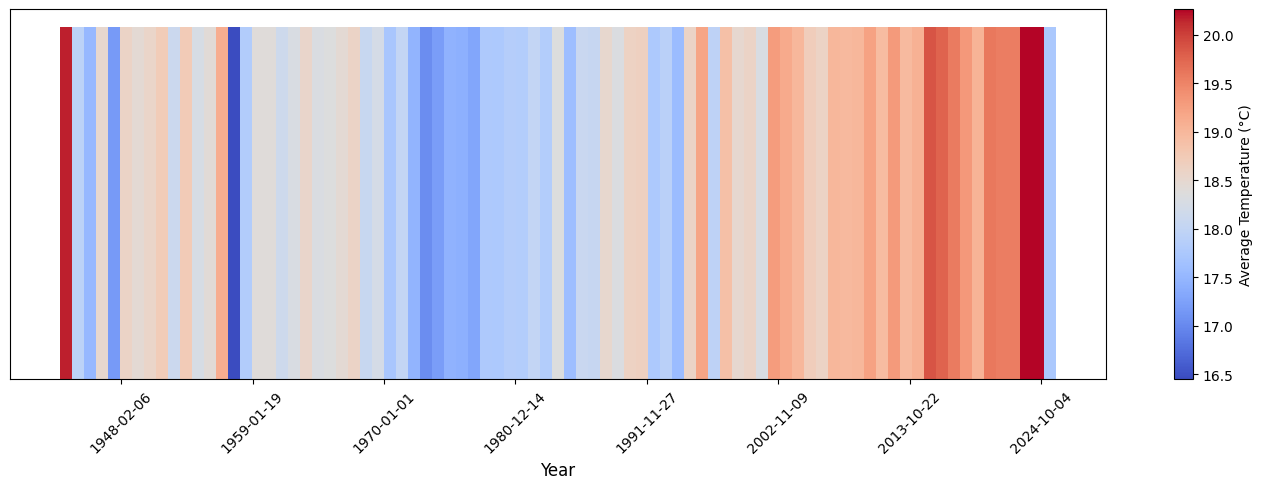

In [8]:
# Create the yearly barcode plot
plt.figure(figsize=(14, 5))
# Set width to 365 to ensure bars are contiguous (365 is a conceptual value; adjust as needed to fill the gaps visually)
plt.bar(yearly_averages.index, [1]*len(yearly_averages), color=plt.cm.coolwarm(normalized_yearly_temp), width=365, align='edge')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))  # Ensure only full year ticks
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.colorbar(plt.cm.ScalarMappable(norm=mcolors.Normalize(yearly_averages.min(), yearly_averages.max()), cmap='coolwarm'), 
             orientation='vertical', label='Average Temperature (°C)')
plt.tight_layout()  # Adjust subplots to give some padding and prevent overlap
plt.show()

In [9]:
# Assuming temperature_data is already loaded and indexed by date
# Reshape data to have rows as years and columns as days of the year
temperature_matrix = temperature_stats['temp_avg'].groupby([temperature_stats.index.year, temperature_stats.index.dayofyear]).mean().unstack()

# Normalize the temperature data for coloring
min_temp = temperature_stats['temp_avg'].min()
max_temp = temperature_stats['temp_avg'].max()

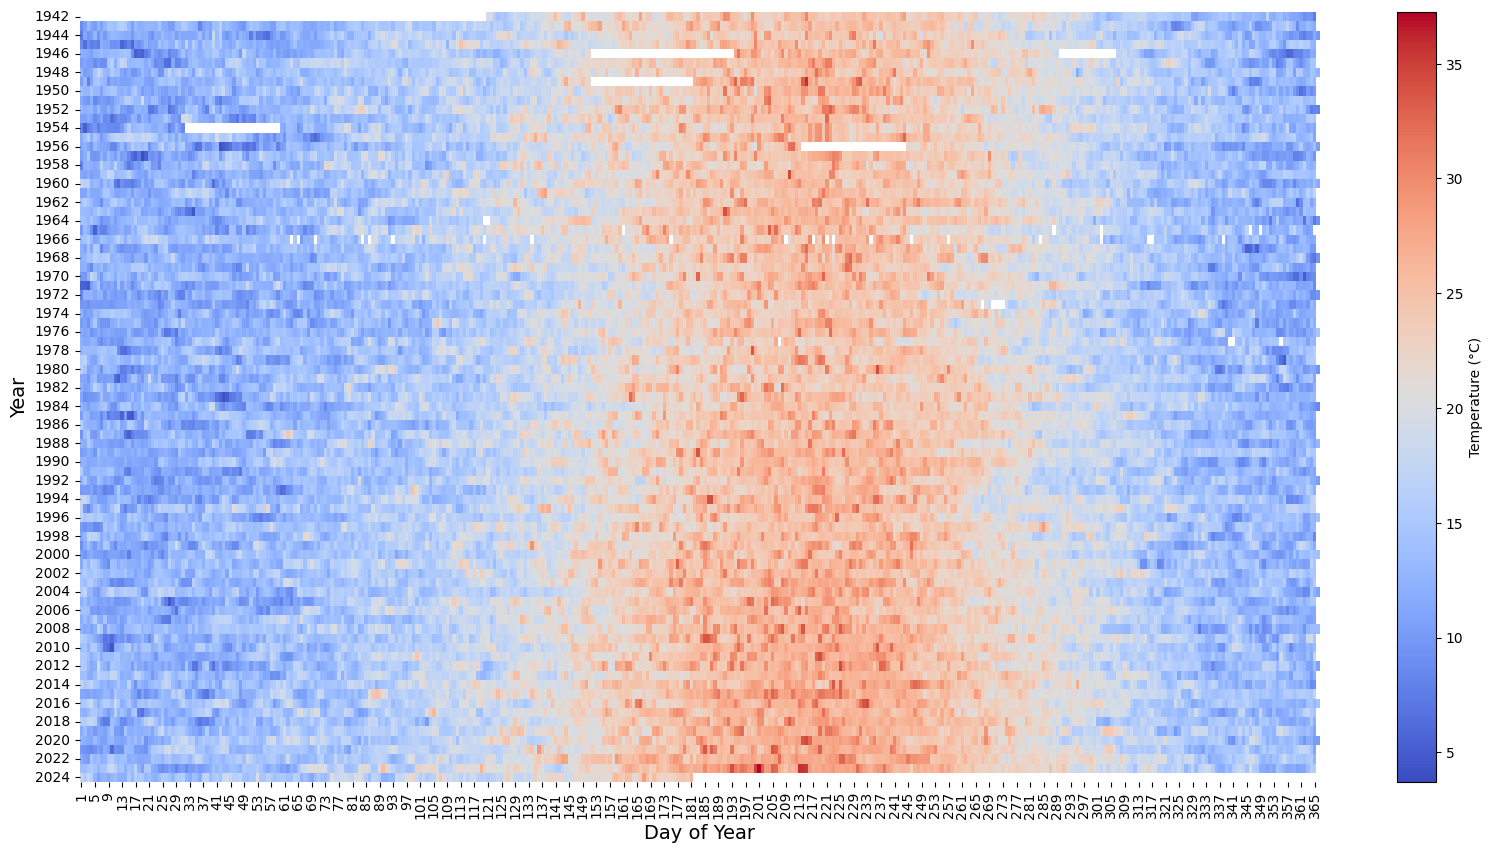

In [10]:
# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(temperature_matrix, cmap='coolwarm', vmin=min_temp, vmax=max_temp, cbar=None)
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(min_temp, max_temp), cmap='coolwarm'), label='Temperature (°C)')
plt.show()


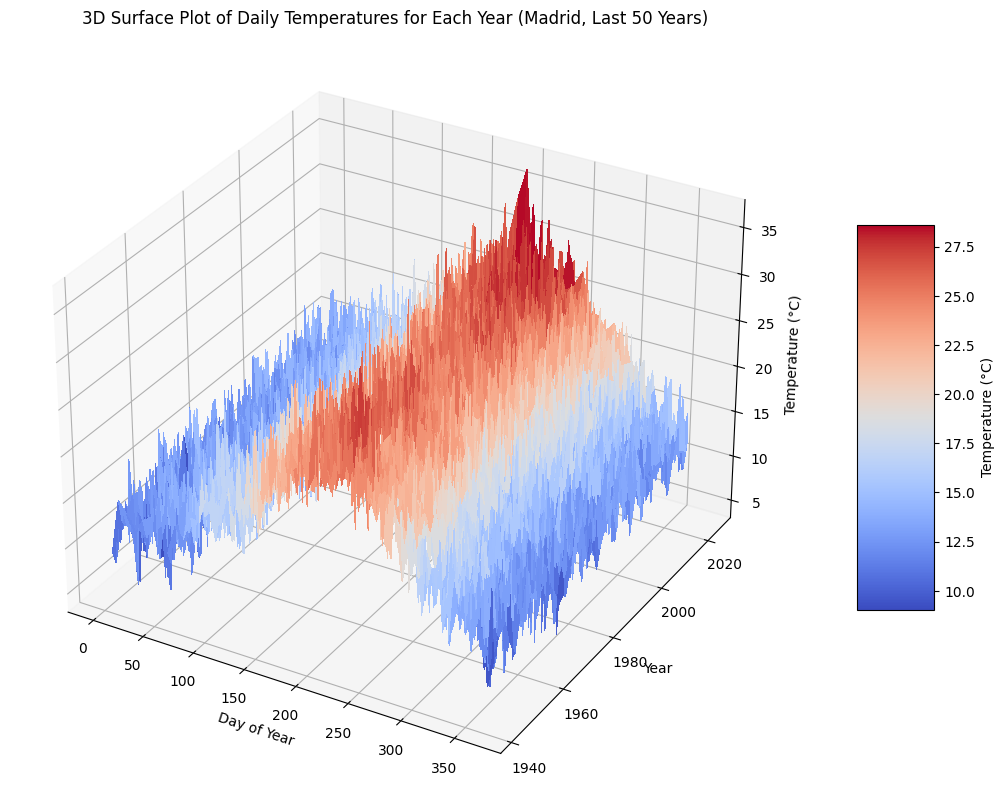

In [11]:
# Prepare the grid for plotting
X = np.arange(1, temperature_matrix.shape[1] + 1)  # Days of the year
Y = np.arange(temperature_matrix.index.min(), temperature_matrix.index.max() + 1)  # Years
X, Y = np.meshgrid(X, Y)
Z = temperature_matrix.values  # Temperatures

# Create the 3D surface plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=False)

# Add color bar which maps values to colors
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_label('Temperature (°C)')

ax.set_xlabel('Day of Year')
ax.set_ylabel('Year')
ax.set_zlabel('Temperature (°C)')
ax.set_title('3D Surface Plot of Daily Temperatures for Each Year (Madrid, Last 50 Years)')

plt.show()

In [12]:
# Prepare the grid for plotting
x = np.arange(1, temperature_matrix.shape[1] + 1)  # Days of the year
y = np.arange(temperature_matrix.index.min(), temperature_matrix.index.max() + 1)  # Years
x, y = np.meshgrid(x, y)
z = temperature_matrix.values  # Temperatures

custom_colorscale = [
    [0, 'blue'],   # cold
    [0.5, 'white'],  # neutral
    [1, 'red']    # hot
]

# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='RdBu_r')])

# Update plot layout
fig.update_layout(title='Daily Temperatures for Each Year',
                  scene=dict(
                      xaxis_title='Day of Year',
                      yaxis_title='Year',
                      zaxis_title='Temperature (°C)'),
                  autosize=False,
                  width=800,
                  height=600,
                  margin=dict(l=65, r=50, b=65, t=90))

# Show the plot
fig.show()